In [69]:
import numpy as np
import matplotlib.pyplot as plt
import random

plt.style.use(['dark_background'])

In [2]:
def output_state(x):
    if x<0.5:
        return 0
    else:
        return 1

# Training

Weights: [ 6.50569176 -0.2257092  -3.03080502]
Error: -3.72%


Text(0,0.5,'Training Error (%)')

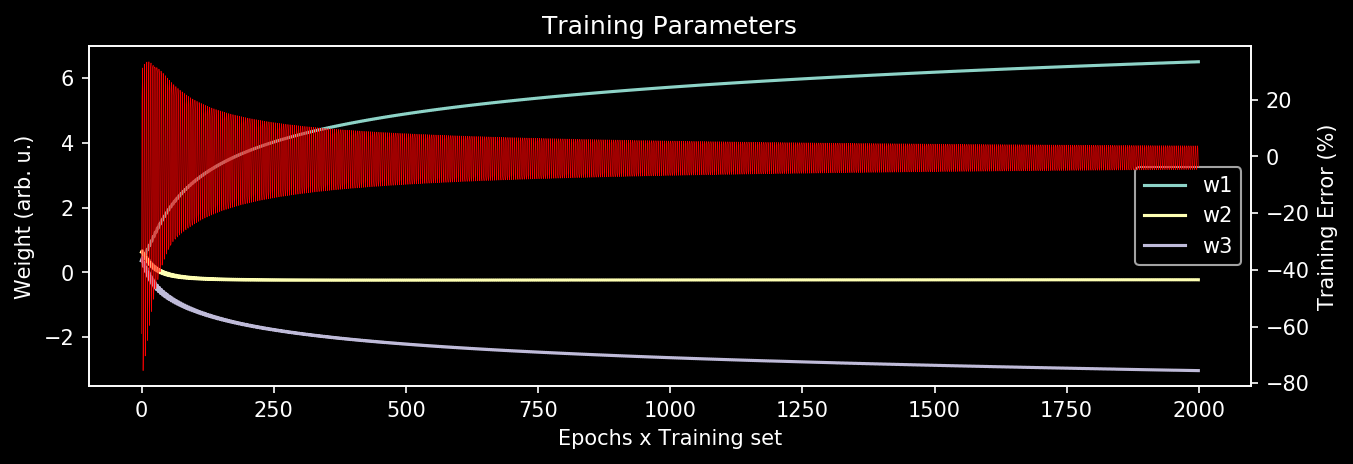

In [226]:
# training set
epoch = 500
train = np.array([[0,0,1],[1,1,1],[1,0,1],[0,1,1]])
train_output = np.array([0,1,1,0])
weights = np.array([(random.randint(0,100)/100.0),(random.randint(0,100)/100.0),(random.randint(0,100)/100.0)])
weight_record = np.zeros([len(train_output)*epoch,np.shape(train)[1]])
err_record = []
#print(np.shape(train)[1])

for j in range(0,len(train_output)*epoch):
    output = 0
    for i in range(0,np.shape(train)[1]):
        output = output + (train[np.mod(j,len(train_output))][i]*weights[i])
    output = 1/(1+np.exp(-output))
    err = (-(output)+train_output[np.mod(j,len(train_output))])
    err_record.append([])
    err_record[j].append(err*100)
    for i in range(0,len(weights)):
        weights[i] = weights[i] + (err*output*(1-output)*train[np.mod(j,len(train_output))][i])
    weight_record[j][:] = weights[:]
print('Weights: '+ str(weights))
print('Error: '+ str(np.round(err*100,2)) + '%')

# plotting
plt.figure(figsize=(10,3),dpi=150)
plt.plot(np.linspace(0,(len(train_output)*epoch)-1,len(train_output)*epoch),weight_record)
plt.legend(['w1','w2','w3'],loc='right')
plt.xlabel('Epochs x Training set')
plt.title('Training Parameters')
plt.ylabel('Weight (arb. u.)')
plt.twinx()
plt.plot(np.linspace(0,(len(train_output)*epoch)-1,len(train_output)*epoch),err_record,color='r',linewidth=0.3)
plt.ylabel('Training Error (%)')

# Model Prediction

In [234]:
query = np.array([1,1,1])

# predict
prediction = query * weights

print('Prediction: ' + str(output_state(1/(1+np.exp(-np.sum(prediction))))))
print('Confidence: ' + str(np.round(100/(1+np.exp(-np.sum(prediction))),2)) + '% (Following Sigmoid function)')

Prediction: 1
Confidence: 96.26% (Following Sigmoid function)
